# Análisis de los Factores de Riesgo del Cáncer Cervical

Librerías

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
cervical_cancer_risk_factors = fetch_ucirepo(id=383)
df: pd.DataFrame = cervical_cancer_risk_factors.data.features

## Análisis Exploratorio de Datos

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
# profile = ProfileReport(df, title="Cervical Cancer Risk Factors Report")
# profile.to_notebook_iframe()
# profile.to_file("report/report.html")

### 1. Conclusiones del EDA
Con el análisis exploratorio, podemos concluir que:
1. **Hay 36 variables:** 10 son numéricas y 26 son categóricas
2. **Hay pocas celdas con valores faltantes:** Los valores faltantes se presentan en *features* categóricos de verdadero/falso. Pueden ser imputados con la moda.
3. **Hay columnas con un valor constate:** Particularmente ``STDs:cervical condylomatosis`` y ``STDs:AIDS`` tienen valores de 0 en todas las observaciones, por lo que pueden ser eliminadas.
4. **Alta correlación:** Existen *features* que tienen alta correlación
5. **Desbalance de datos:** Los *features* tienen mucho desbalance de clases.
6. **Datos atípicos:** La cantidad de datos atípicos es muy baja, por lo que podemos eliminar esas observaciones.

### 2. Descripción de variables
- **Age** (Edad de la paciente): Cuantitativa (continua)
- **Number.of.sexual.partners** (Cantidad de parejas sexuales): Cuantitativa (discreta)
- **First.sexual.intercourse** (Edad del primer encuentro sexual): Cuantitativa (discreta)
- **Num.of.pregnancies** (Cantidad de embarazos): Cuantitativa (discreta)
- **Smokes** (Si fuma o no): Categórica (Nominal)
- **Smokes.years** (Años que lleva fumando): Cuantitativa (continua)
- **Smokes.packs.per.year** (Cajetillas de cigarrillos por año): Cuantitativa (continua)
- **Hormonal.Contraceptives** (Si usa anticonceptivos hormonales o no): Categórica (Nominal)
- **Hormonal.Contraceptives.years** (Años usando anticonceptivos hormonales): Cuantitativa (continua)
- **IUD** (Si tiene colocado algún dispositivo intrauterino): Categórica (Nominal)
- **IUD.years** (Años usando un DIU): Cuantitativa (continua)
- **STDs** (Si ha tenido enfermedades de transmisión sexual): Categórica (Nominal)
- **STDs.number** (Cuantas ETS ha tenido): Cuantitativa (discreta)
- **STDs.condylomatosis** (Si ha tenido condilomatosis): Categórica (Nominal)
- **STDs.cervical.condylomatosis** (Si ha tenido condilomatosis cervical): Categórica (Nominal)
- **STDs.vaginal.condylomatosis** (Si ha tenido condilomatosis vaginal): Categórica (Nominal)
- **STDs.vulvo.perineal.condylomatosis** (Si ha tenido condilomatosis vulvo perineal): Categórica (Nominal)
- **STDs.syphilis** (Si ha tenido Sífilis): Categórica (Nominal)
- **STDs.pelvic.inflammatory.disease** (Si ha tenido inflamaciones pélvicas): Categórica (Nominal)
- **STDs.genital.herpes** (Si ha tenido herpes genital): Categórica (Nominal)
- **STDs.molluscum.contagiosum** (Si ha tenido molusco contagioso): Categórica (Nominal)
- **STDs.AIDS** (Si tiene SIDA): Categórica (Nominal)
- **STDs.HIV** (Si tiene VIH): Categórica (Nominal)
- **STDs.Hepatitis.B** (Si ha tenido o tiene hepatitis B): Categórica (Nominal)
- **STDs.HPV** (Si ha tenido o tiene Virus del Papiloma Humano): Categórica (Nominal)
- **STDs.Number.of.diagnosis** (Cantidad de diagnósticos de ETS): Cuantitativa (discreta)
- **STDs.Time.since.first.diagnosis** (Tiempo desde el primer diagnóstico): Cuantitativa (continua)
- **STDs.Time.since.last.diagnosis** (Tiempo desde el último diagnóstico): Cuantitativa (continua)
- **Dx.Cancer (Si tiene diagnóstico** de cáncer o no): Categórica (Nominal)
- **Dx.CIN** (Si tiene diagnóstico de NIC): Categórica (Nominal)
- **Dx.HPV** (Si tiene diagnóstico de Virus del Papiloma Humano): Categórica (Nominal)
- **Dx** (Si tiene algún diagnóstico): Categórica (Nominal)
- **Hinselmann** (Si hicieron Colposcopía): Categórica (Nominal)
- **Schiller** (Si hicieron la prueba de Schiller): Categórica (Nominal)
- **Citology** (Si hicieron citología): Categórica (Nominal)
- **Biopsy** (Si hicieron Biopsia): Categórica (Nominal)

### 3. Gráficos Exploratorios
Para este paso ha sido útil la utiliación de ``ydata_profiling``. Para poder ver los gráficos exploratorios abra en un navegador el [archivo HTML](report/report.html). Luego, en el menú de navegación visite la opción llamada ``Variables``

### 4. Análisis de variables

#### 4.1 Limpieza de datos

##### 4.1.1 Eliminación de columnas constantes
``STDs:cervical condylomatosis`` y ``STDs:AIDS`` tienen valores constantes de 0, por lo que se eliminarán.

``STDs:vaginal condylomatosis``, ``STDs:pelvic inflammatory disease``, ``STDs:genital herpes``, ``STDs:molluscum contagiosum``, ``STDs:Hepatitis B`` y ``STDs:HPV`` tienen un desbalance total de clases, donde la clase minoritaría tiene < 5 muestras. Por lo que se eliminarán.

In [5]:
to_drop = ['STDs:cervical condylomatosis', 'STDs:AIDS', 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV']

df.drop(to_drop, axis=1, inplace=True)

##### 4.1.2 Manejo de Datos Faltantes

In [6]:
from sklearn.impute import SimpleImputer

``Number of sexual partners``, ``Num of Pregnancies``, ``Smokes``, ``Smokes (years)``, ``Smokes (packs/year)`` les hacen falta valores, pero la cantidad no es significante, por lo que se eliminarán las observaciones con valores faltantes.

In [7]:
to_drop = ['Number of sexual partners', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)']

df.dropna(subset=to_drop, inplace=True)

``STDs: Time since first diagnosis`` y ``STDs: Time since last diagnosis`` tienen, prácticamente todos los valores faltantes (91.7%), por lo que este *feature* se eliminará.

In [8]:
to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

df.drop(to_drop, axis=1, inplace=True)

El resto de variables tienen alrededor de 100 valores faltantes, por lo que se imputarán con la moda. Esto provocará que las variables categóricas tengan valores faltantes imputados con ``False`` y, donde se tiene *(years)* se imputará con ``0``. 

In [9]:
imp = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

##### 4.1.3 Corrección de tipos de datos

In [10]:
categorical_columns = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
    'STDs:vulvo-perineal condylomatosis', 
    'STDs:syphilis',
    'STDs:HIV',
    'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

for column in categorical_columns:
    df[column] = df[column].astype('bool')

In [11]:
integer_columns = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'STDs (number)', 'STDs: Number of diagnosis',
]

for column in integer_columns:
    df[column] = df[column].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 766 non-null    int32  
 1   Number of sexual partners           766 non-null    int32  
 2   First sexual intercourse            766 non-null    int32  
 3   Num of pregnancies                  766 non-null    int32  
 4   Smokes                              766 non-null    bool   
 5   Smokes (years)                      766 non-null    float64
 6   Smokes (packs/year)                 766 non-null    float64
 7   Hormonal Contraceptives             766 non-null    bool   
 8   Hormonal Contraceptives (years)     766 non-null    float64
 9   IUD                                 766 non-null    bool   
 10  IUD (years)                         766 non-null    float64
 11  STDs                                766 non-n

In [13]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis'],
      dtype='object')

In [14]:
categorical_columns = df.select_dtypes(include=[bool]).columns
categorical_columns

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:HIV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 766 non-null    int32  
 1   Number of sexual partners           766 non-null    int32  
 2   First sexual intercourse            766 non-null    int32  
 3   Num of pregnancies                  766 non-null    int32  
 4   Smokes                              766 non-null    bool   
 5   Smokes (years)                      766 non-null    float64
 6   Smokes (packs/year)                 766 non-null    float64
 7   Hormonal Contraceptives             766 non-null    bool   
 8   Hormonal Contraceptives (years)     766 non-null    float64
 9   IUD                                 766 non-null    bool   
 10  IUD (years)                         766 non-null    float64
 11  STDs                                766 non-n

#### 4.2 Análisis de Correlación
Para este paso ha sido útil la utiliación de ``ydata_profiling``. Para poder ver los gráficos exploratorios abra en un navegador el [archivo HTML](report/report.html). Luego, en el menú de navegación visite la opción llamada ``Correlations``.

#### 4.3 Análisis de Outliers
Gracias a las gráficas del reporte, se pueden apreciar algunos valores atípicos en las variables numéricas. Verificaremos y removeremos de manera acorde a los valores atípicos.

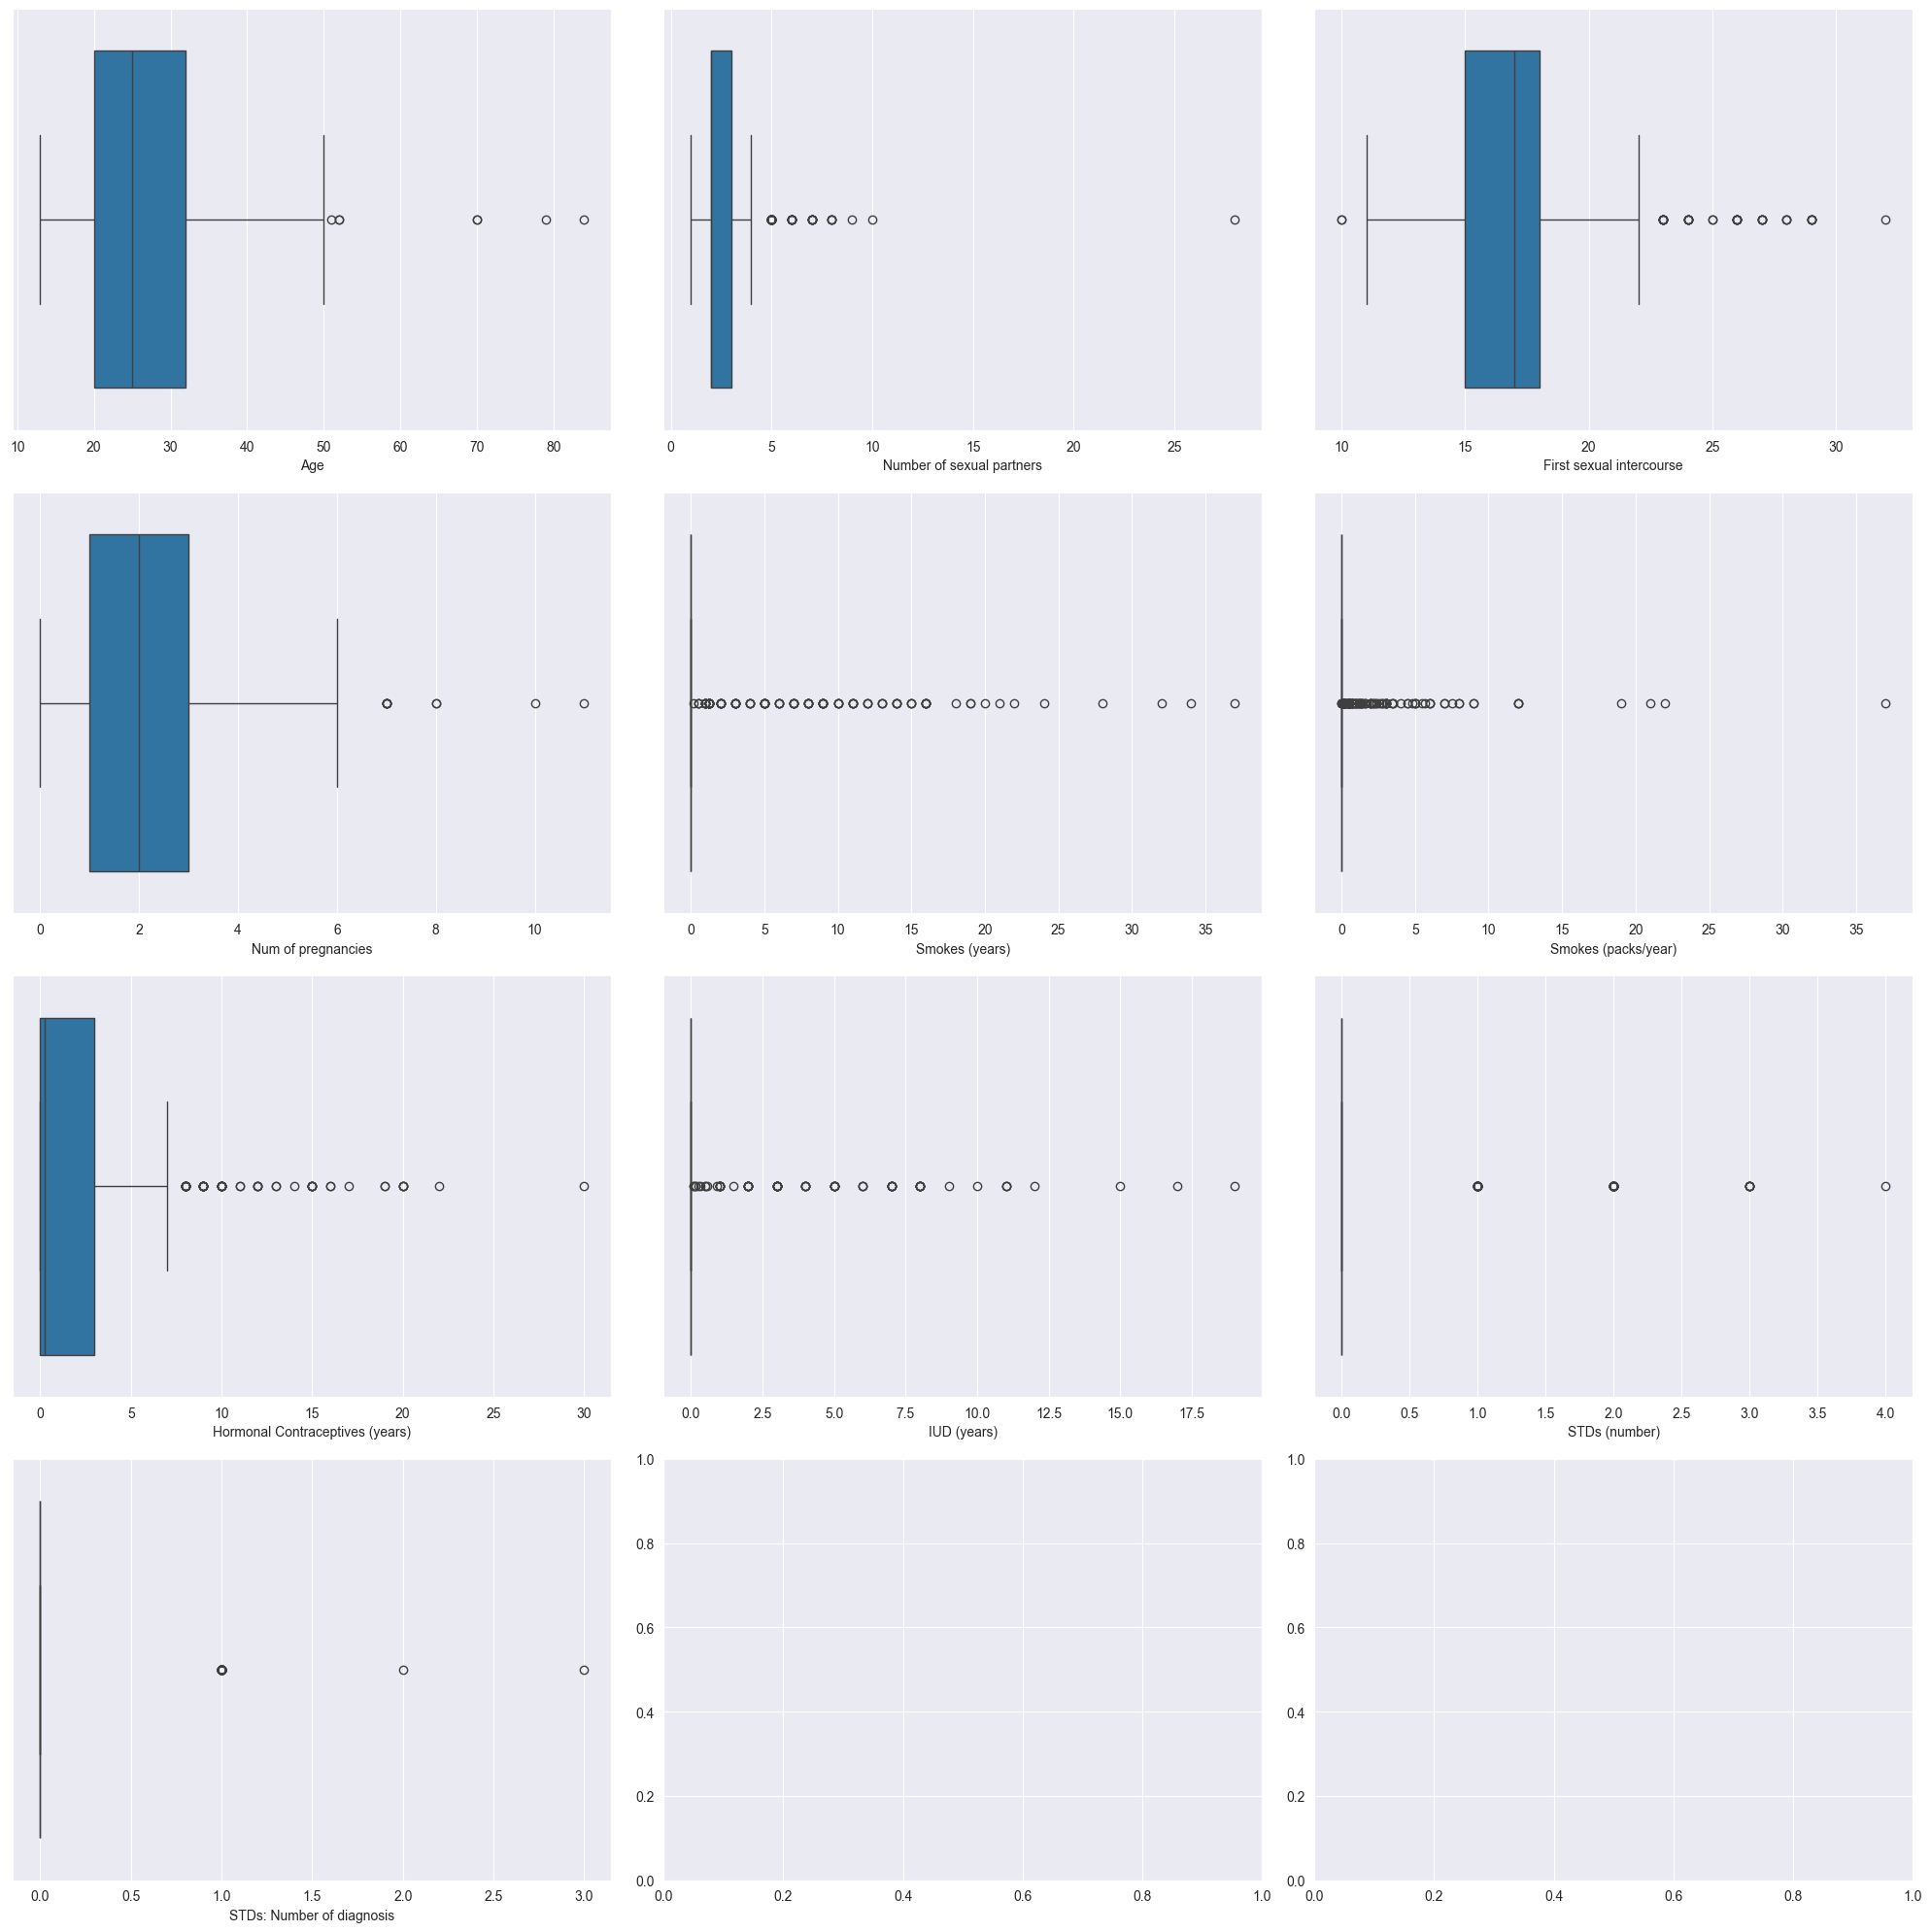

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
plt.tight_layout()
plt.show()

Podemos observar cómo ``Smokes (years)``, ``Smokes (packs/year)`` y  ``IUD (years)`` están conformados por múltiples outliers. Se ha hecho la prueba con y sin estos *features* y eliminarlos no representa una mejora significativa en el modelo. Para evitar perder información, se mantendrán como se encuentran.

Eliminamos los valores atípicos en base a las gráficas de caja y bigotes.

In [17]:
df = df[df['Age'] < 51]
df = df[df['Number of sexual partners'] < 5]
df = df[df['First sexual intercourse'] < 23]
df = df[df['STDs (number)'] < 3]
df = df[df['STDs: Number of diagnosis'] < 2]

In [18]:
df.shape

(661, 26)

### 5. Análisis de Variables Categóricas

#### 5.1 Diagramas de Barra

In [19]:
%matplotlib inline

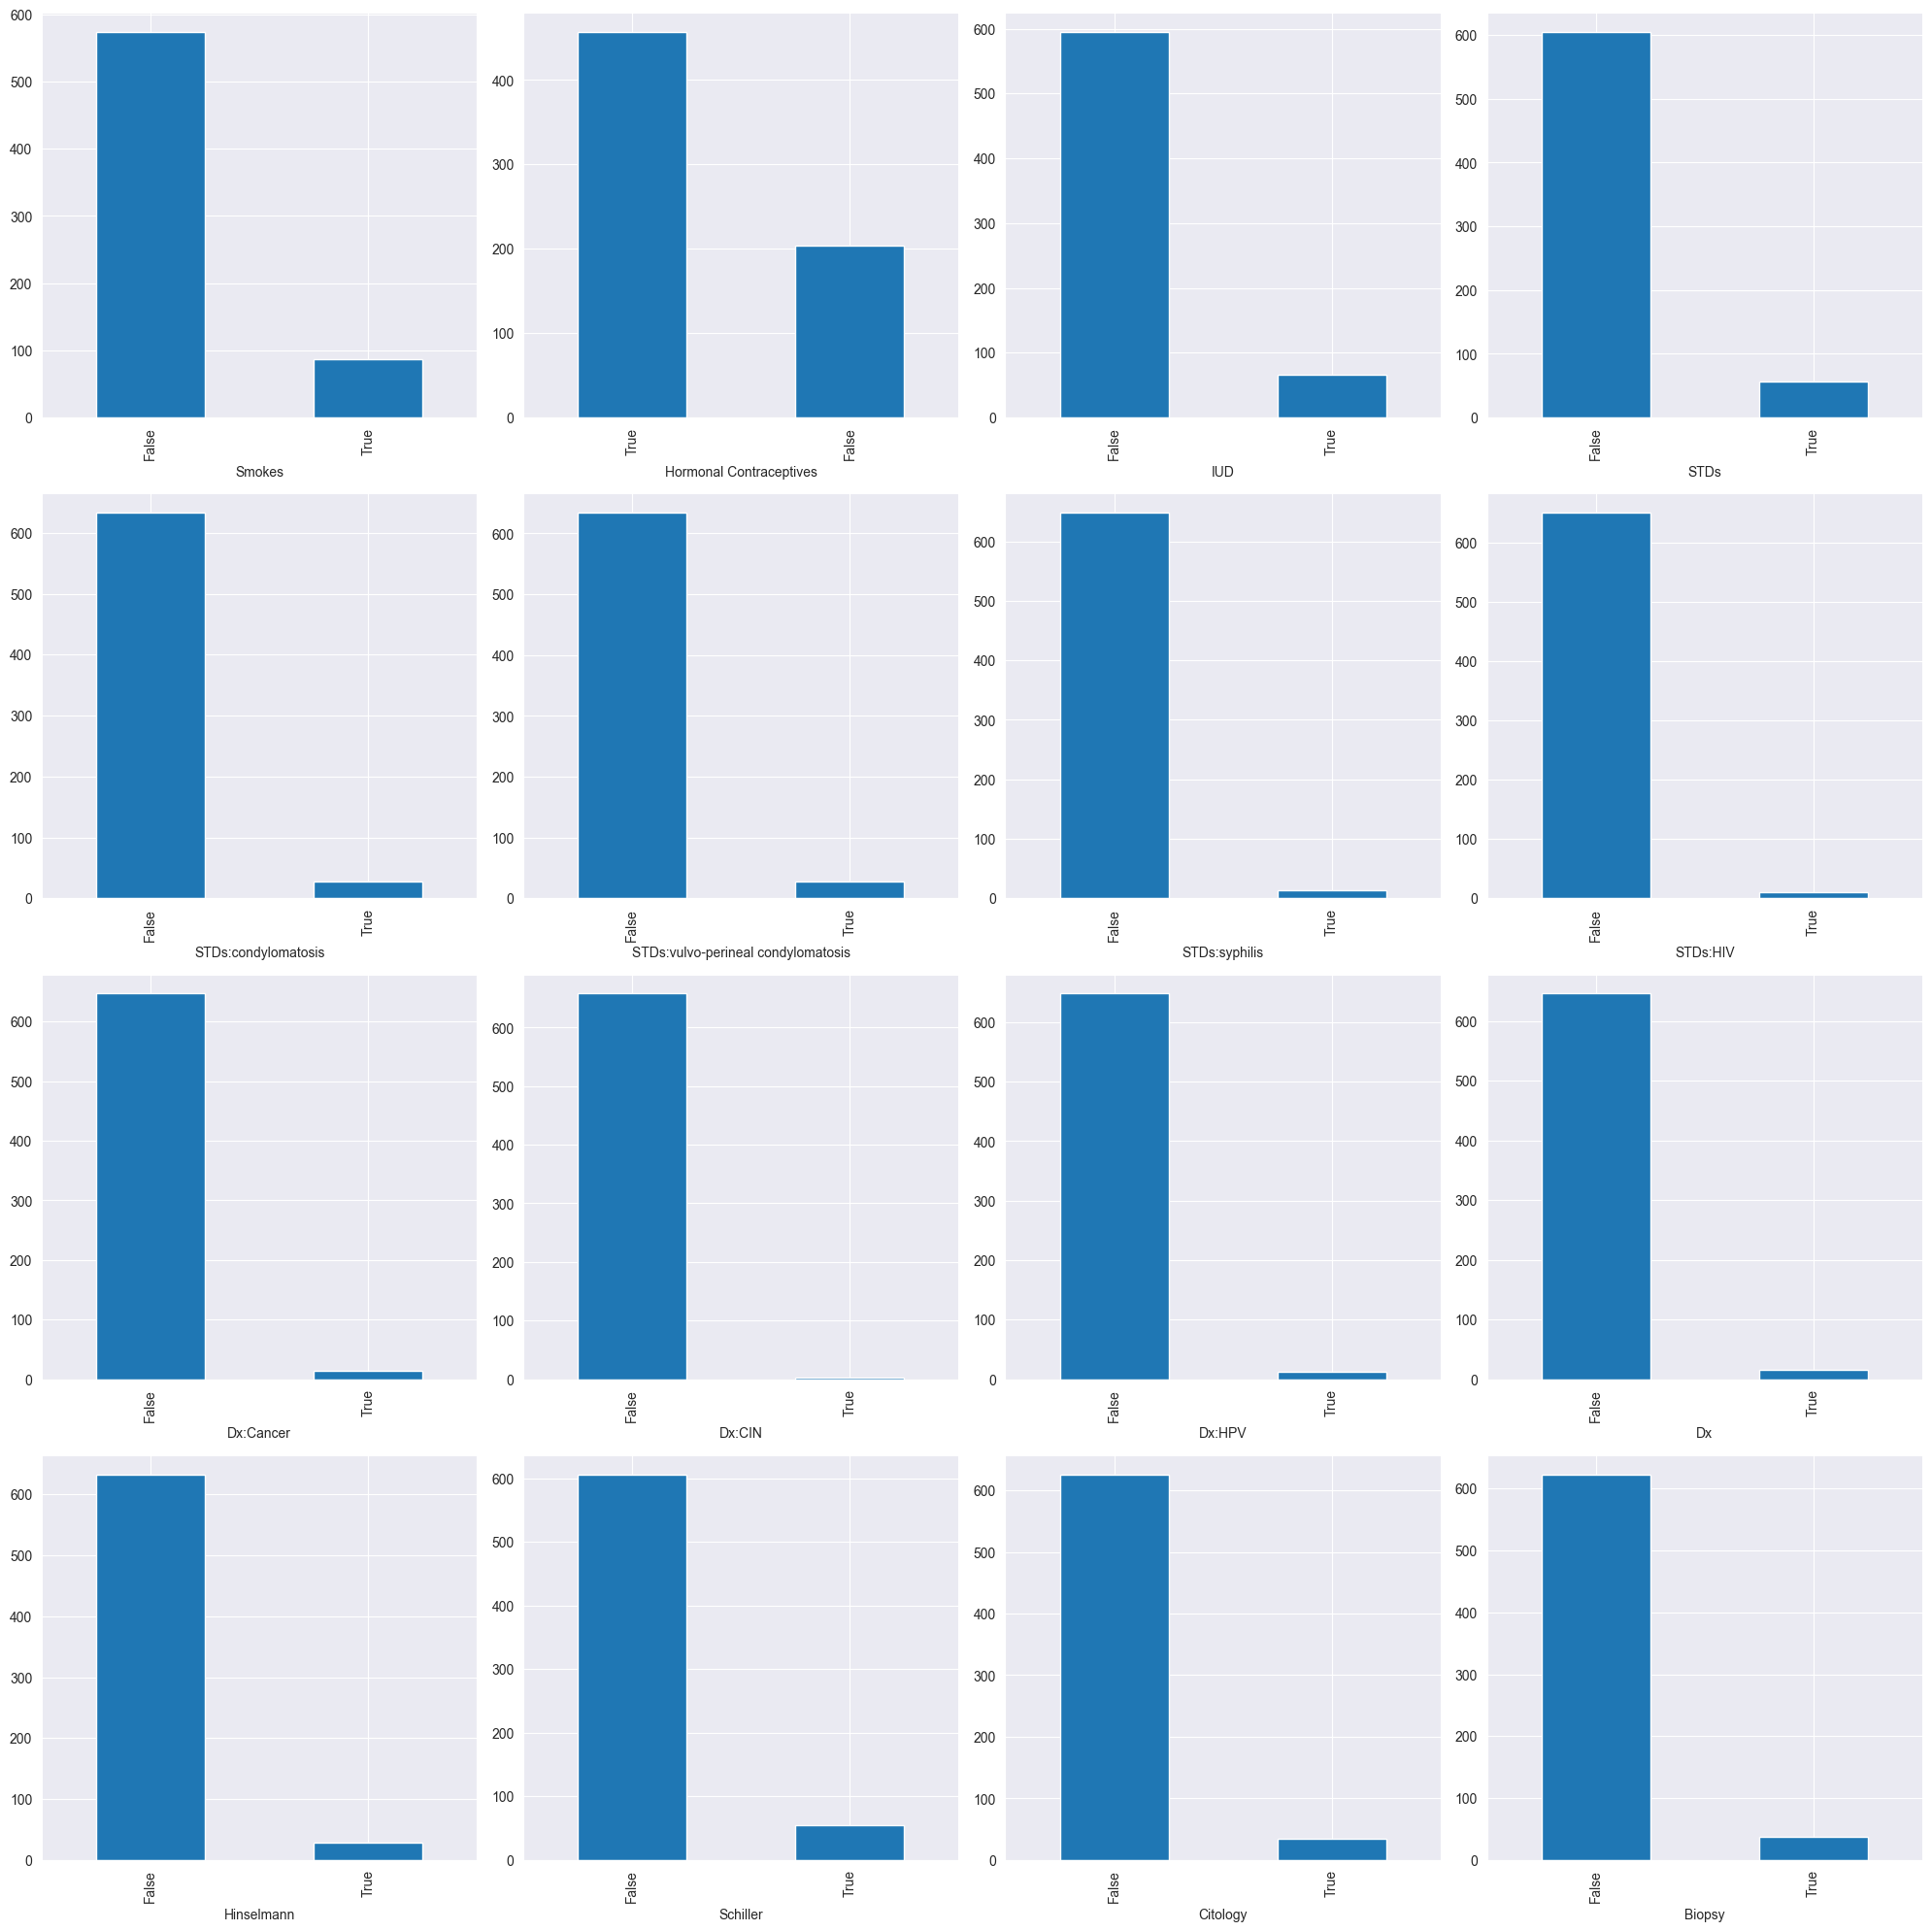

In [36]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot.bar(ax=axes[i])
plt.tight_layout()
plt.show()

### 6. Comportamiento de valores faltantes
Esta celda fue colocada para mantener el orden del notebook, pero el proceso fue registrado en la parte **4.1**

In [21]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:HIV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0
Citology                              0


### 7. PCA en variables categóricas
El proceso de realización de PCA es posible realizarse con PCA (después de haber transformado las variables categóricas a numéricas). Sin embargo, no es recomendable, pues a este tipo de variables les hace falta la estructura numérica para poder realizar el análisis. Para este tipo de situaciones, es recomendable utilizar el Análisis de Correspondencia Múltiple (MCA).

Fuentes: [Villasante, P. & Kebabci, C. (2023)](https://statisticsglobe.com/pca-categorical-variables)

### 8. Ejecución de PCA
Realizado únicamente con variables numéricas

In [22]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [23]:
numerical_df = df[numerical_columns]

#### 8.1. Bartlett's Test
H0: La matriz de correlación es una matriz identidad

H1: La matriz de correlación no es una matriz identidad

In [24]:
chi_square_value, p_value = calculate_bartlett_sphericity(numerical_df)
print("Se {} la hipótesis nula. P={}".format(
    ('rechaza' if p_value < 0.05 else 'acepta'), 
    p_value)
)

Se rechaza la hipótesis nula. P=0.0


#### 8.2. Kaiser-Meyer-Olkin Test

In [25]:
kmo_all, kmo_model = calculate_kmo(numerical_df)
print("KMO: {}".format(kmo_model))

KMO: 0.5204864291426247


El realizar el PCA con las variables numéricas no representa una mejora significativa en el modelo. 

#### 8.3 Expliación de la Varianza

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()
pca.fit(numerical_df)

PCA()

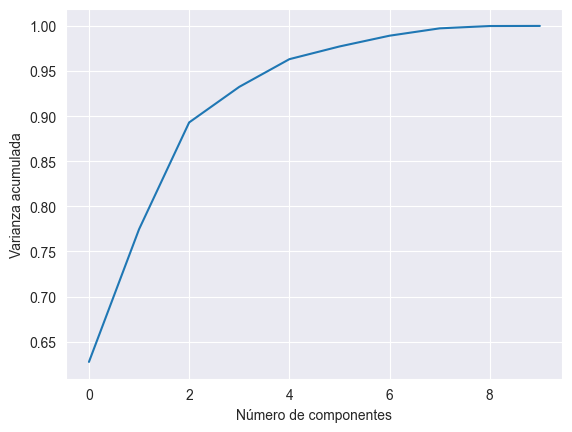

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

La cantidad de componentes óptimos sin perder mucha varianza es de 4.

#### 8.4 Análisis de Componentes Principales

In [29]:
pca = PCA(n_components=4)
pca.fit(numerical_df)

PCA(n_components=4)

In [30]:
pca.explained_variance_ratio_.sum()

0.9324439944042101

In [32]:
pca.components_

array([[ 9.55304312e-01,  2.49380131e-02,  9.38762685e-02,
         9.70843708e-02,  9.04440298e-02,  3.25277065e-02,
         2.37272068e-01,  5.46422137e-02,  2.77218175e-03,
         1.99317401e-03],
       [-3.96272044e-02,  4.30488652e-02, -6.80685370e-02,
         2.40129514e-02,  8.87806444e-01,  3.91890744e-01,
        -2.22356073e-01,  9.72948365e-03,  5.64189738e-03,
         4.37932501e-03],
       [-2.45222138e-01,  1.12704126e-03, -5.48367865e-02,
         7.00504257e-03,  1.91185584e-01,  6.89381212e-02,
         9.42702480e-01, -8.25307834e-02,  1.34246595e-03,
        -1.78866350e-03],
       [-7.55848732e-03, -8.57701751e-02,  6.98216817e-01,
        -1.67912755e-01,  3.97962894e-02,  4.90694084e-02,
        -3.18020783e-02, -6.86935531e-01,  1.00499384e-03,
        -7.56131223e-04]])

**Composición:**

In [33]:
print("PC1 (Age): {}".format(numerical_columns[0]))
print("PC2 (Smoking Habits): {}, {}".format(numerical_columns[4], numerical_columns[5]))
print("PC3 (Hormonal Contraceptives Usage): {}".format(numerical_columns[6]))
print("PC3 (Sexual and Contraceptive History): {}, {}".format(numerical_columns[2], numerical_columns[7]))

PC1 (Age): Age
PC2 (Smoking Habits): Smokes (years), Smokes (packs/year)
PC3 (Hormonal Contraceptives Usage): Hormonal Contraceptives (years)
PC3 (Sexual and Contraceptive History): First sexual intercourse, IUD (years)


In [34]:
numerical_df_pca = pca.transform(numerical_df)

In [35]:
numerical_df_pca = pd.DataFrame(numerical_df_pca, columns=['Age', 'Smoking Habits', 'Hormonal Contraceptives Usage', 'Sexual and Contraceptive History'])
numerical_df_pca

,Age,Smoking Habits,Hormonal Contraceptives Usage,Sexual and Contraceptive History
0,-8.679219,-0.106394,-0.130907,-0.686512
1,-11.713822,-0.048591,0.656215,-1.104743
2,6.530836,-0.869576,-4.057843,-0.550138
3,22.457956,-4.930718,6.834277,2.396152
4,17.896902,-1.549766,-7.001450,2.186152
...,...,...,...,...
656,16.746733,-2.340015,-1.644739,0.111893
657,6.765257,-1.011697,-4.227104,1.540885
658,6.918847,-2.798396,3.756001,1.917660
659,-1.932315,-0.647821,-1.890979,0.993921


#### 8.5. Análisis de Correlación

A pesar de que el KMO indicaba que no representaba una mejora significativa, el realizar el PCA ayudó a reducir la dimensionalidad en las variables numéricas de 10 a 4; perdiendo solamente 0.07 de varianza. Los nuevos componentes son claros con la combinación lineal de estos, dejando en claro la manera en la que afecta la edad (Age), los hábitos del paciente respecto al tabaco (Smoking Habits), el uso de anticonceptivos hormonales (Hormonal Contraceptives Usage), y la historia sexual y de IUD de la paciente.